In [1]:
import numpy as np
import seaborn as sns
from pandas import read_excel
from pandas import DataFrame
from matplotlib import pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS

In [3]:
df=read_excel('http://itpaper.co.kr/data/eurodist.xlsx', engine='openpyxl')
df

,city,Athens,Barcelona,Brussels,Calais,Cherbourg,Cologne,Copenhagen,Geneva,Gibraltar,...,Lisbon,Lyons,Madrid,Marseilles,Milan,Munich,Paris,Rome,Stockholm,Vienna
0,Athens,0,3313,2963,3175,3339,2762,3276,2610,4485,...,4532,2753,3949,2865,2282,2179,3000,817,3927,1991
1,Barcelona,3313,0,1318,1326,1294,1498,2218,803,1172,...,1305,645,636,521,1014,1365,1033,1460,2868,1802
2,Brussels,2963,1318,0,204,583,206,966,677,2256,...,2084,690,1558,1011,925,747,285,1511,1616,1175
3,Calais,3175,1326,204,0,460,409,1136,747,2224,...,2052,739,1550,1059,1077,977,280,1662,1786,1381
4,Cherbourg,3339,1294,583,460,0,785,1545,853,2047,...,1827,789,1347,1101,1209,1160,340,1794,2196,1588
5,Cologne,2762,1498,206,409,785,0,760,1662,2436,...,2290,714,1764,1035,911,583,465,1497,1403,937
6,Copenhagen,3276,2218,966,1136,1545,760,0,1418,3196,...,2971,1458,2498,1778,1537,1104,1176,2050,650,1455
7,Geneva,2610,803,677,747,853,1662,1418,0,1975,...,1936,158,1439,425,328,591,513,995,2068,1019
8,Gibraltar,4485,1172,2256,2224,2047,2436,3196,1975,0,...,676,1817,698,1693,2185,2565,1971,2631,3886,2974
9,Hamburg,2977,2018,597,714,1115,460,460,1118,2897,...,2671,1159,2198,1479,1238,805,877,1751,949,1155


In [4]:
df2 = df.set_index('city')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, Athens to Vienna
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Athens           21 non-null     int64
 1   Barcelona        21 non-null     int64
 2   Brussels         21 non-null     int64
 3   Calais           21 non-null     int64
 4   Cherbourg        21 non-null     int64
 5   Cologne          21 non-null     int64
 6   Copenhagen       21 non-null     int64
 7   Geneva           21 non-null     int64
 8   Gibraltar        21 non-null     int64
 9   Hamburg          21 non-null     int64
 10  Hook of Holland  21 non-null     int64
 11  Lisbon           21 non-null     int64
 12  Lyons            21 non-null     int64
 13  Madrid           21 non-null     int64
 14  Marseilles       21 non-null     int64
 15  Milan            21 non-null     int64
 16  Munich           21 non-null     int64
 17  Paris            21 non-null     int64
 18  Rome    

### 도시간의 거리를 2차원 좌표로 변환

- 2차원으로 21개 도시들을 매핑한다.
- MDS 함수 파라미터
- `n_components` : 차원 수 (기본값=2)
- `metric` : True (계량적 MDS, 기본값), Fasle: (비계량적 MDS)
- `dissimilarity` : 사용할 비 유사성 측정 방법
      * `euclidean` : 데이터 셋의 점 사이의 쌍별 유클리드 거리
      * `precomputed` : 계산된 비 유사성 결과값을 fit 함수를 통해 전달함.
- `random_state` : random seed 값을 고정해야 할 경우 int형으로 지정

In [6]:
model = MDS(n_components=2, metric=True, dissimilarity='precomputed', random_state=777)
# 데이터셋에서 변환을 위한 기반 설정 수행.
fit = model.fit(df2)
# 학습실행
coords = model.fit_transform(df2)
coords

array([[  322.20581328, -2738.49409221],
       [  937.74627969,   316.20229935],
       [ -371.19977067,   173.42188567],
       [ -349.71572678,   369.91201789],
       [ -136.67562073,   657.95984602],
       [ -562.05812699,    15.0324555 ],
       [-1270.50773716,    24.04507154],
       [  274.12038123,  -153.06446401],
       [ 1661.93731789,  1259.73052873],
       [ -939.7299543 ,   -70.13455282],
       [ -596.81296157,   197.56072542],
       [ 1138.10024323,  1576.38482788],
       [  271.60626908,    38.79166297],
       [ 1032.72322741,   993.96514083],
       [  583.4680355 ,   -30.12518242],
       [  225.31528086,  -470.77428862],
       [ -240.10204934,  -532.45091934],
       [ -109.25765444,   271.97880834],
       [  483.9701182 , -1122.1156254 ],
       [-1961.04204858,   187.30785426],
       [ -394.09131584,  -965.13399957]])

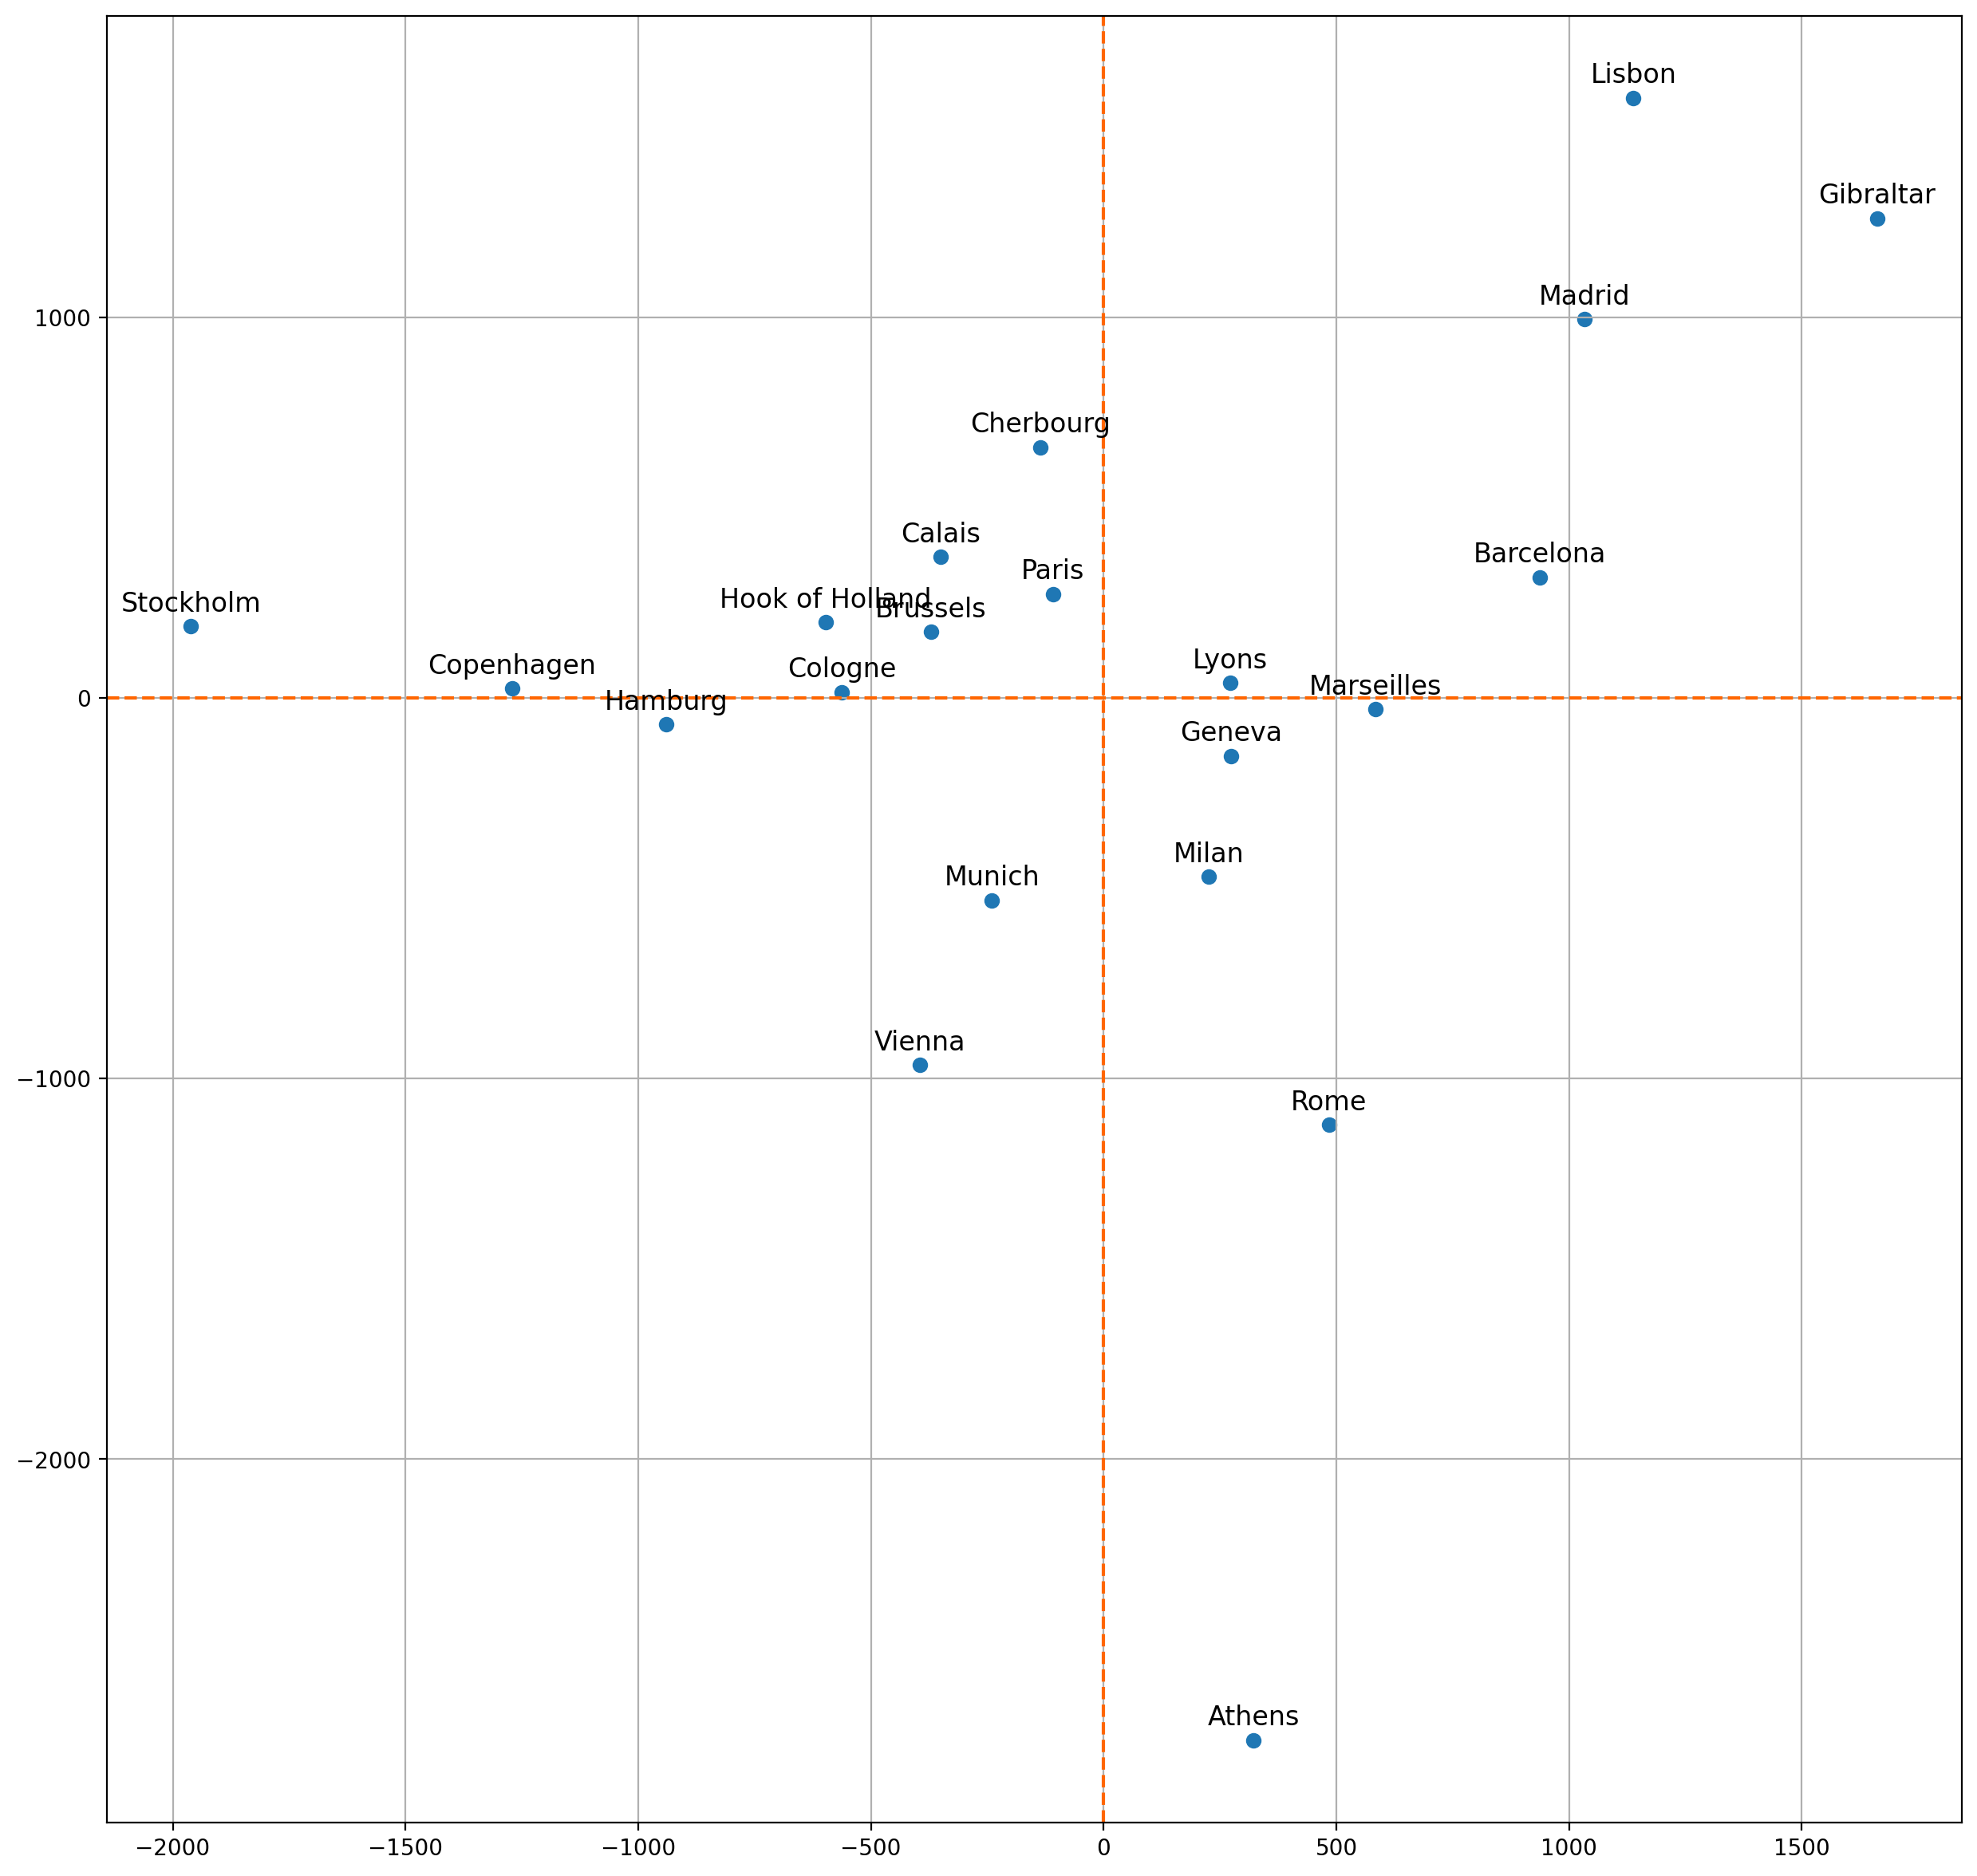

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15), dpi=200)
ax.scatter(coords[:,0], coords[:,1])
ax.grid()

for label, x, y in zip(df2.columns, coords[:,0], coords[:,1]):
    ax.text(x, y+25, label, fontsize=12, horizontalalignment='center', verticalalignment='bottom')

# y축 좌표 0을 가로지르는 가로 직선 그리기
ax.axhline(0, ls='--', color='#ff6600')
# x축 좌표 0을 가로지르는 세로 직선 그리기
ax.axvline(0, ls='--', color='#ff6600')
    
plt.savefig('mds1.png', dpi=200, bbox_inches='tight')
plt.show()
plt.close()

## 이진 변수 그룹핑

### 데이터 가져오기

- 경미한 두뇌 손상을 입은 환자들의 특성을 증상 여부(0, 1)를 조사한 자료.
- `age.65` : 나이 65세 이상/미만
- `amnesia.before` : 기억상실 여부
- `basal.skull.fracture`: 골절여부
- `GCS.decrease`: GCS 감소여부
- `GCS.13`: GCS 초기 감소여부
- `GCS.15.2hours` : GCS 15시간 이후 감소여부
- `high.risk` : 고위험 여부
- `loss.of.consciousness` : 의식 상실
- `open.skull.fracture` : 골절여부
- `vomiting` : 구토여부
- `clinically.important.brain.injury` : 임상적 주요 뇌손상여부

In [9]:
df=read_excel('http://itpaper.co.kr/data/head_injury.xlsx', engine='openpyxl')
df

,age.65,amnesia.before,basal.skull.fracture,GCS.decrease,GCS.13,GCS.15.2hours,high.risk,loss.of.consciousness,open.skull.fracture,vomiting,clinically.important.brain.injury
0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3116,0,0,0,0,0,1,1,0,0,0,0
3117,0,0,0,0,0,0,1,0,0,1,0
3118,0,0,0,0,0,0,0,0,0,0,0
3119,0,0,0,0,0,0,0,0,0,0,0


In [11]:
df2 = df.rename(columns={
    "age.65": "나이 65세 이상/미만",
    "amnesia.before": "기억상실 여부",
    "basal.skull.fracture": "골절여부",
    "GCS.decrease": "GCS 감소여부",
    "GCS.13": "GCS 초기 감소여부",
    "GCS.15.2hours": "GCS 15시간 이후 감소여부",
    "high.riks": "고위험 여부",
    "loss.of.consciousness": "의식 상실",
    "open.skull.fracture": "골절여부",
    "vomiting": "구토여부",
    "clinically.important.brain.injury": "임상적 주요 뇌손상여부"
})
df2

,나이 65세 이상/미만,기억상실 여부,골절여부,GCS 감소여부,GCS 초기 감소여부,GCS 15시간 이후 감소여부,high.risk,의식 상실,골절여부,구토여부,임상적 주요 뇌손상여부
0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3116,0,0,0,0,0,1,1,0,0,0,0
3117,0,0,0,0,0,0,1,0,0,1,0
3118,0,0,0,0,0,0,0,0,0,0,0
3119,0,0,0,0,0,0,0,0,0,0,0


In [12]:
df2 = df2.iloc[0:100,:]

In [13]:
df_mds = df2.T
df_mds

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
나이 65세 이상/미만,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
기억상실 여부,1,0,0,0,0,1,0,0,0,1,...,0,1,0,1,1,0,0,0,0,0
골절여부,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCS 감소여부,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCS 초기 감소여부,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCS 15시간 이후 감소여부,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
high.risk,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
의식 상실,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
골절여부,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
구토여부,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0


In [14]:
distance=pairwise_distances(np.array(df_mds), metric='jaccard')
distance

c:\users\junhong\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


array([[0.        , 0.84848485, 0.90909091, 1.        , 1.        ,
        0.89473684, 0.93548387, 0.94444444, 0.91666667, 1.        ,
        0.91666667],
       [0.84848485, 0.        , 0.96296296, 1.        , 1.        ,
        0.94285714, 0.93478261, 0.97058824, 1.        , 1.        ,
        1.        ],
       [0.90909091, 0.96296296, 0.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , 0.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ],
       [0.89473684, 0.94285714, 1.        , 1.        , 1.        ,
        0.        , 0.93333333, 0.875     , 0.90909091, 1.        ,
        0.90909091],
       [0.93548387, 0.93478261, 1.        , 1.        , 1.

In [15]:
model = MDS(n_components=2, metric=True, dissimilarity='precomputed', random_state=777)
fit = model.fit(distance)
coords = model.fit_transform(distance)
coords

array([[-0.03962957, -0.21989509],
       [ 0.46186715,  0.50144609],
       [ 0.2446444 , -0.66674667],
       [-0.44782618,  0.5617708 ],
       [-0.65315885, -0.30447954],
       [ 0.09983632,  0.19314671],
       [-0.25920464, -0.59674322],
       [ 0.02543188,  0.63830204],
       [ 0.59533473, -0.27162615],
       [-0.64822041,  0.14187282],
       [ 0.62092518,  0.0229522 ]])

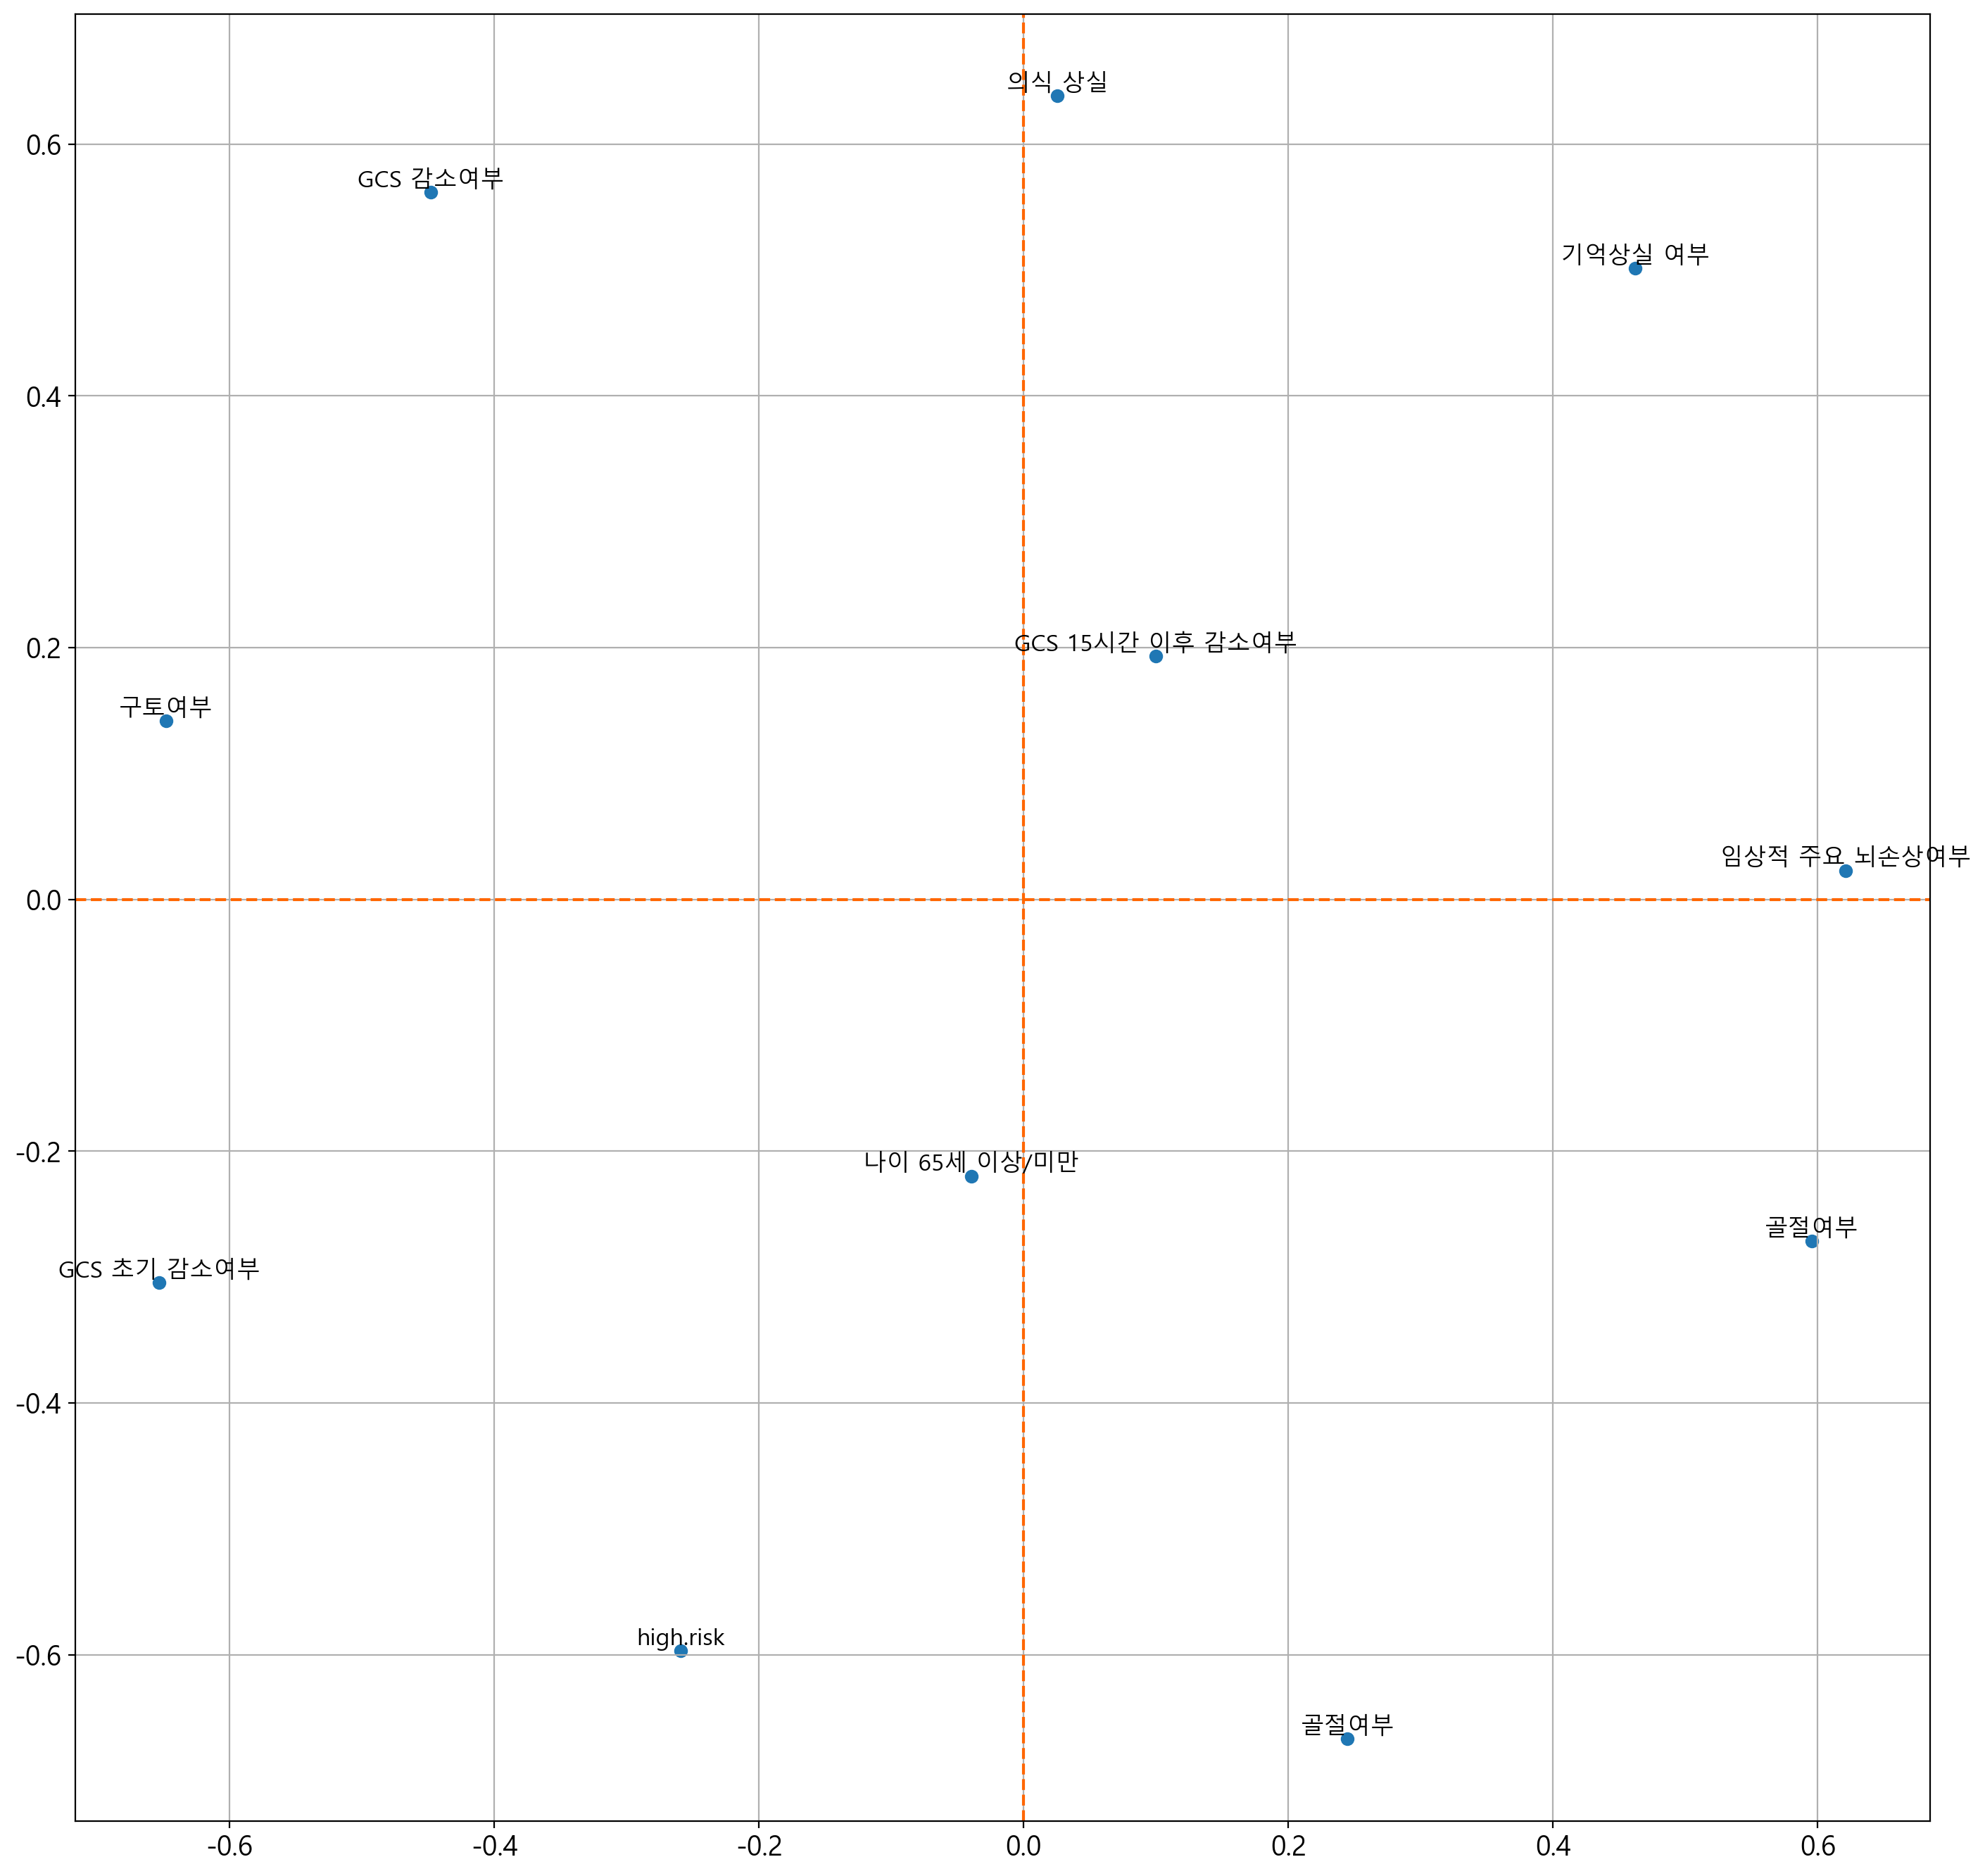

In [16]:
plt.rcParams["font.family"] = 'Malgun Gothic' # 한글 지원 폰트 설정
plt.rcParams["font.size"] = 14                # 기본 글자크기 설정
plt.rcParams["axes.unicode_minus"] = False    # 유니코드 뺄셈기호 표시 사용 안함(깨짐방지)

fig, ax = plt.subplots(1, 1, figsize=(17, 17), dpi=200)
ax.scatter(coords[:,0], coords[:,1])
ax.grid()

for label, x, y in zip(df2.columns, coords[:,0], coords[:,1]):
    ax.text(x, y, label, fontsize=12, horizontalalignment='center', verticalalignment='bottom')

# y축 좌표 0을 가로지르는 가로 직선 그리기
ax.axhline(0, ls='--', color='#ff6600')
# x축 좌표 0을 가로지르는 세로 직선 그리기
ax.axvline(0, ls='--', color='#ff6600')
    
#plt.savefig('mds2.png', dpi=200, bbox_inches='tight')
plt.show()
plt.close()